In [15]:
%run -i CouplingsModel_1.py
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import glob
import pandas as pd

from evcouplings.couplings import read_raw_ec_file
from evcouplings.compare import (
    PDB, DistanceMap, SIFTS, intra_dists,
    multimer_dists, coupling_scores_compared
)

from evcouplings.visualize import plot_contact_map, plot_context
from evcouplings.visualize.pairs import plot_pairs, scale
direc = '/home/as974/ada'
#direc = '/Users/adashaw/Dropbox (Harvard University)/Debbie-Ada'

def scale_01(a):
    return (a - np.min(a))/np.ptp(a)
def plot_top_n(z,n,mod = 'corrected'):
    z[z<np.sort(z.flatten())[::-1][n-1]] = 0
    zscal = scale_01(z)
    if mod == 'corrected':
        zscal[np.triu_indices(len(zscal))] = 0
        for r in range(len(z)):
            for c in range(len(z)):
                plt.scatter(r,c,s=zscal[r,c]*100,c='g')
    else:
        zscal[np.tril_indices(len(zscal))] = 0
        for r in range(len(z)):
            for c in range(len(z)):
                plt.scatter(r,c,s=zscal[r,c]*100,c='r')
    plt.axis('square')
    plt.axis([-1,len(zscal),-1,len(zscal)])
    plt.gca().invert_xaxis()

def plot_top_n_contacts(file, mod = 'cor'):
    df = read_raw_ec_file(file)
    df['i'] += 43
    df['j'] += 43
    df['i'][df['i']>32+43] += 1
    df['j'][df['j']>32+43] += 1
    df.head()
    df['cn_scaled'] = scale_01(df.cn)
    for index,row in df.nlargest(100,'cn').iterrows():
        if abs(row.i-row.j)>1:
            if mod == 'cor':
                plt.scatter(row.i,row.j,s=row.cn_scaled*50,c='g')
            else:
                plt.scatter(row.j,row.i,s=row.cn_scaled*50,c='r')
    plt.axis('square')

In [16]:
s = SIFTS("/n/groups/marks/databases/SIFTS/pdb_chain_uniprot_plus_current.o2.csv", "/n/groups/marks/databases/SIFTS/pdb_chain_uniprot_plus_current.o2.fasta")

In [24]:
selected_structures = s.by_alignment(
    reduce_chains=True, sequence_id="ANK1_HUMAN", region=(43, 106),
    jackhmmer="/n/groups/marks/pipelines/evcouplings/software/hmmer-3.1b2-linux-intel-x86_64/binaries/jackhmmer",
)

distmap_intra = intra_dists(selected_structures)
distmap_multimer = multimer_dists(selected_structures)

STYLE_CONTACT = {
    "edgecolor": "none",
    "c": "#b6d4e9",
    "s": 100,
}
scale_func = lambda x: x#scale(x, ax=None)

glob.glob(direc+'/repeatsProject/PF00023/cOutput/*.model')

/n/groups/marks/software/anaconda_o2/envs/evcouplings_stable/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['/home/as974/ada/repeatsProject/PF00023/cOutput/PF00023_ones.model',
 '/home/as974/ada/repeatsProject/PF00023/cOutput/PF00023_heni.model',
 '/home/as974/ada/repeatsProject/PF00023/cOutput/PF00023_no_correction.model',
 '/home/as974/ada/repeatsProject/PF00023/cOutput/PF00023heni.model',
 '/home/as974/ada/repeatsProject/PF00023/cOutput/PF00023.model']

In [18]:
correctedModel = CouplingsModel_1(direc+'/repeatsProject/PF00023/cOutput/PF00023.model')
uncorrectedModel = CouplingsModel_1(direc+'/repeatsProject/PF00023/cOutput/PF00023_no_correction.model')

In [19]:
files = glob.glob(direc + '/repeatsProject/PF00023/cOutput/*.txt')
files

['/home/as974/ada/repeatsProject/PF00023/cOutput/PF00023_heniECscores.txt',
 '/home/as974/ada/repeatsProject/PF00023/cOutput/PF00023_ECscores_no_correction.txt',
 '/home/as974/ada/repeatsProject/PF00023/cOutput/PF00023_ECscores_ones.txt',
 '/home/as974/ada/repeatsProject/PF00023/cOutput/PF00023_ECscores.txt']

In [20]:
file = files[-1]
file

'/home/as974/ada/repeatsProject/PF00023/cOutput/PF00023_ECscores.txt'

CouplingsModel_1.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  Float matrix of size len(sequences) x 3, where each row corresponds to the
CouplingsModel_1.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  1) total Hamiltonian of sequence and the 2) J_ij and 3) h_i sub-sums
CouplingsModel_1.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  Float matrix of size len(sequences) x 3, where each row corresponds to the
CouplingsModel_1.py:43: SettingWithCopyWarning: 
A value is t

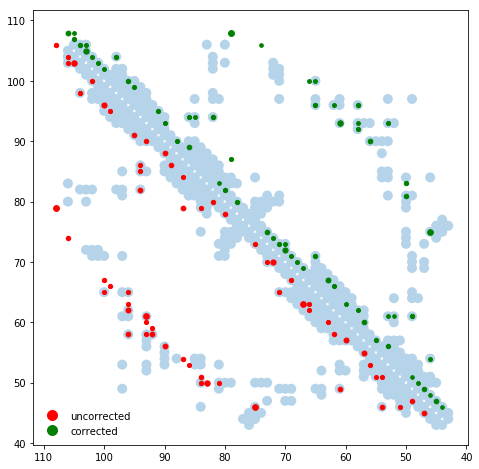

In [25]:
plt.figure(figsize=[8,8])
plot_pairs(distmap_intra.contacts(),symmetric=False, style=scale_func(STYLE_CONTACT))
plot_top_n_contacts(file)
plot_top_n_contacts(files[1],mod='uncor')
plt.gca().invert_xaxis()
red = mlines.Line2D([], [], color='r', marker='o', linestyle='None', markersize=10, label='uncorrected')
green = mlines.Line2D([], [], color='g', marker='o', linestyle='None', markersize=10, label='corrected')
plt.legend(handles=[red,green],loc='lower left',frameon=False)

## defunct stuff

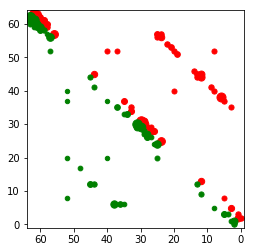

In [10]:
plot_top_n(uncorrectedModel.cn_scores,100,mod='uncorrected')
plot_top_n(correctedModel.cn_scores,100)
red = mlines.Line2D([], [], color='r', marker='o', linestyle='None', markersize=10, label='uncorrected')
green = mlines.Line2D([], [], color='g', marker='o', linestyle='None', markersize=10, label='corrected')
#plt.legend(handles=[red,green],loc='lower left',frameon=False)
plt.show()